**Problem Statement:**

Financial threats are displaying a trend about the credit risk of commercial banks as the incredible improvement in the financial industry has arisen. 

In this way, one of the The biggest threats faced by commercial banks is the risk prediction of credit clients.

The goal is to predict the probability of credit default based on credit card owner's characteristics and payment history.


##Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline 
import warnings
warnings.simplefilter("ignore")
from pprint import pprint
import joblib
import imblearn

from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn import metrics  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier


##DataSet

**About Dataset**

**Dataset Information**

This dataset contains information on default payments, demographic factors,
credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/HariKumarN14/Projects/main/Credit%20Card%20Default%20Prediction/UCI_Credit_Card.csv")

In [4]:
df.shape

(30000, 25)

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

**Content**

There are 25 Variables:

● ID: ID of each client

● LIMIT_BAL: Amount of given credit in NT dollars (includes individual and
family/supplementary credit

● SEX: Gender (1=male, 2=female)

● EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others,
5=unknown, 6=unknown)

● MARRIAGE: Marital status (1=married, 2=single, 3=others)

● AGE: Age in years

● PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight
months, 9=payment delay for nine months and above)

● PAY_2: Repayment status in August, 2005 (scale same as above)

● PAY_3: Repayment status in July, 2005 (scale same as above)

● PAY_4: Repayment status in June, 2005 (scale same as above)

● PAY_5: Repayment status in May, 2005 (scale same as above)

● PAY_6: Repayment status in April, 2005 (scale same as above)


● BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

● BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

● BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

● BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

● BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

● BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)


● PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

● PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

● PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

● PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

● PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

● PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

● default.payment.next.month: Default payment (1=yes, 0=no)


In [7]:
df.loc[0] #viewing first row to understand data

ID                                1.0
LIMIT_BAL                     20000.0
SEX                               2.0
EDUCATION                         2.0
MARRIAGE                          1.0
AGE                              24.0
PAY_0                             2.0
PAY_2                             2.0
PAY_3                            -1.0
PAY_4                            -1.0
PAY_5                            -2.0
PAY_6                            -2.0
BILL_AMT1                      3913.0
BILL_AMT2                      3102.0
BILL_AMT3                       689.0
BILL_AMT4                         0.0
BILL_AMT5                         0.0
BILL_AMT6                         0.0
PAY_AMT1                          0.0
PAY_AMT2                        689.0
PAY_AMT3                          0.0
PAY_AMT4                          0.0
PAY_AMT5                          0.0
PAY_AMT6                          0.0
default.payment.next.month        1.0
Name: 0, dtype: float64

In [8]:
df['PAY_0'].unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6])

0 and -2 are not explained in the data description

After online research, it is found that,

0=The use of revolving credit, meaning the payment wasn't due, which makes sense that most customers were using the revolving credit.

-2= No consumption

##Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

1) There are no missing values/null values

2) Datatypes of all features are appropriate

In [10]:
# Change inconsistent column name "PAY_0" to 'PAY_1', 
# 'default.payment.next.month'to 'DEFAULT' for easiness of use

df.rename(columns={'PAY_0':'PAY_1','default.payment.next.month':'DEFAULT'},inplace = True)
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [11]:
# Check if there is any duplicate IDs
condition = df.duplicated(subset = 'ID').any()

if condition:
    print('There are duplicate IDs')
else:
    print('No duplicate IDs')

No duplicate IDs


N0 duplicate entries present in dataset

In [12]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [13]:
print(df['SEX'].unique())
print(df['SEX'].value_counts())

[2 1]
2    18112
1    11888
Name: SEX, dtype: int64


In [14]:
print(df['EDUCATION'].unique())
print(df['EDUCATION'].value_counts())

[2 1 3 5 4 6 0]
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64


0 is not defined in the dataset, also 5,6 are unknown while 4 is others.

Since the counts are comparitively small, let's change/combine 0,4,5,6 to others

In [15]:
df["EDUCATION"] = df["EDUCATION"].replace({4:0,5:0,6:0})
df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

In [16]:
print(df['MARRIAGE'].unique())
print(df['MARRIAGE'].value_counts())

[1 2 3 0]
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


0 is not defined for marriage column in the description,
while 3 is others.

Since the count is relatively small, let's combine 0 and 3  as others


In [17]:
df["MARRIAGE"] = df["MARRIAGE"].replace({0:3})
df["MARRIAGE"].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [18]:
#Saving cleaned data for further use
df.to_csv("UCI_Credit_Card_Cleaned.csv", index=None) 

##EDA

In [19]:
#reading the cleaned datset again to check 
df=pd.read_csv("https://raw.githubusercontent.com/HariKumarN14/Projects/main/Credit%20Card%20Default%20Prediction/UCI_Credit_Card_Cleaned.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_1      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

The objective is to see how the probability of default payment vary by categories of different demographic variables like sex,age,education,marital status

In [20]:
# Set ID as dataframe index

df.set_index('ID', inplace = True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [21]:
# Create a new column "HAS_DEF" to indicate customers who have at least 1 deafult payment from PAY_1 to Pay_6
# 0 : no default ; 1: has default

def_condition = (df.PAY_1 >1) | (df.PAY_2 >1) | (df.PAY_3 >1) | (df.PAY_4 >1) | (df.PAY_5 >1) | (df.PAY_6 >1)
df.loc[def_condition, "HAS_DEF"] = 1
df.loc[df.HAS_DEF.isna(), "HAS_DEF"] = 0

In [22]:
#Different method
#creating dataframes to find percentage  defaulters

#df1=df[df['HAS_DEF']==0]     #dataframe with no defaulters
#x_no=pd.DataFrame(df1.groupby('SEX')['HAS_DEF'].count())
#print(x_no)
#df2=df[df['HAS_DEF']==1]      #dataframe with  defaulters
#x_yes=pd.DataFrame(df2.groupby('SEX')['HAS_DEF'].count())
#print(x_yes)
#x=pd.DataFrame(df.groupby('SEX')['HAS_DEF'].count())
#print(x)

#finding percentage of defaulters
# %of male defaulters:
#male_default_percent=math.ceil((x_yes.loc[1]/x.loc[1])*100)
#print("The percentage of male defaulters is {}%".format(male_default_percent))

# %of female defaulters:
#female_default_percent=math.ceil((x_yes.loc[2]/x.loc[2])*100)
#print("The percentage of female defaulters is {}%".format(female_default_percent))

In [23]:
#Creating a function to plot stacked bar charts to visualize the default payment trends of different demographic variables

def stacked_bar(col_name):
  default_by_group = pd.crosstab(index=df['HAS_DEF'],columns = df[col_name], normalize = 'columns')
  default_by_group = default_by_group.apply(lambda x: round(x,2))

  labels = default_by_group.columns
  list1 = default_by_group.iloc[0].to_list()
  list2 = default_by_group.iloc[1].to_list()

  list1_name = "No default"
  list2_name = "Has default"
  title = f"Default by {col_name}"
  xlabel = col_name
  ylabel = "Default percentage"

  fig, ax = plt.subplots(figsize=(10, 5))
  bar_width = 0.5
    
  ax1 = ax.bar(labels,list1, bar_width, label = list1_name)
  ax2 = ax.bar(labels,list2, bar_width, bottom = list1, label = list2_name)

  ax.set_title(title, fontweight = "bold")
  ax.set_xlabel(xlabel, fontweight = "bold")
  ax.set_ylabel(ylabel, fontweight = "bold")
  ax.legend(loc="best")
    
  plt.xticks(default_by_group.columns.to_list(), labels,rotation=90)
  #plt.yticks(fontsize=9)

  for r1, r2 in zip(ax1, ax2):
      h1 = r1.get_height()
      h2 = r2.get_height()
      plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")
      plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")

  plt.show()

### SEX vs Default probability

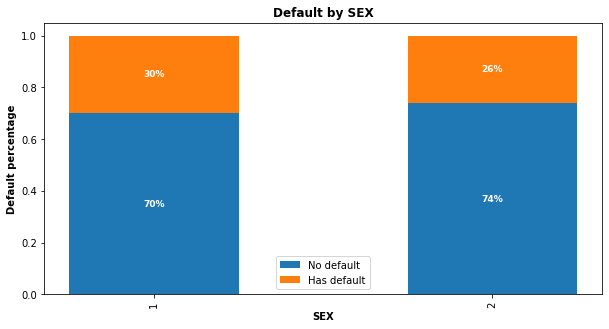

In [24]:
# visualising defaulters based on sex
stacked_bar('SEX')

**The percentage of male defaulters is 31%**

**The percentage of female defaulters is 27%**

There is no significant difference in defaulters depending on the sex


### EDUCATION vs Default probability

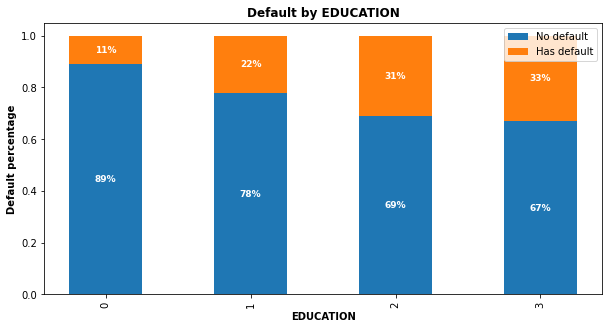

In [25]:
# visualising defaulters based on Education
stacked_bar('EDUCATION')

0 is others; 1 is graduate school; 2 is university; 3 is high school

The highest default percentage is for high school which is the lowest levelof education given

**This indicates customers with lower levels of education default more** 

### MARITAL STATUS vs Default probability

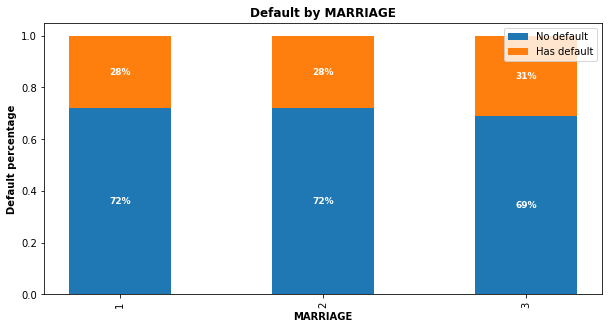

In [26]:
# visualising defaulters based on Marital status
stacked_bar('MARRIAGE')

**There is no Default chance based on  whether the customer is single or married**

But, higher default chance for others category, which can include divorced customers, single parents etc..

### AGE vs Default probability

In [27]:
#finding the lowest and highest age
print("Lowest age:",df['AGE'].min())
print("highest age:",df['AGE'].max())

Lowest age: 21
highest age: 79


In [28]:
# Segmenting  the 'AGE' column to 6 groups

bins= [20,30,40,50,60,70,80]
labels = ['20-30','30-40','40-50','50-60','60-70','70-80']
df['AGE'] = pd.cut(df['AGE'],bins=bins, labels=labels,right=False)

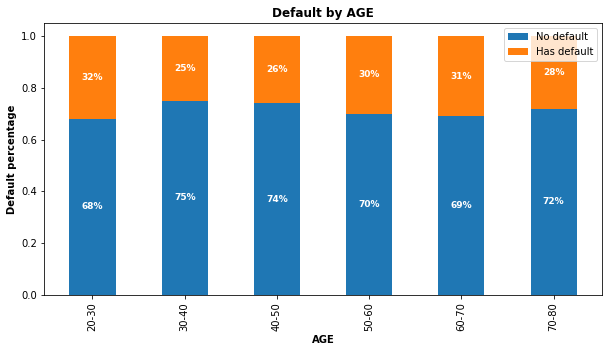

In [29]:
# visualising defaulters based on Age
stacked_bar('AGE')

**Customers in the age group 30-50 (30-40 and 40-50) show lesser default compared to other groups. Same trend is followed by age group above 70**

This could be because in the age group 30-50 customers tend to have a stable income source and experience in handling financial matters


##Model Building

In [ ]:
#reading the cleaned datset again to check 
df=pd.read_csv("https://raw.githubusercontent.com/HariKumarN14/Projects/main/Credit%20Card%20Default%20Prediction/UCI_Credit_Card_Cleaned.csv")
df.info()

In [20]:
data=df

In [ ]:
data.columns

In [22]:
#setting features and target( x and y)
x=data[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].values
y=data["DEFAULT"].values

In [23]:
#splitting training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [24]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

###Logistic Regression

In [25]:
clf_lr=LogisticRegression()
clf_lr.fit(x_train,y_train)

LogisticRegression()

In [26]:
#score
print("\n Accuracy:",clf_lr.score(x_test,y_test)*100,"%")


 Accuracy: 81.69999999999999 %


In [27]:
# Define a function to compute Precision, Recall and F1 score

def get_pre_rec_f1(model,x_test,y_test):
    y_pred = model.predict(x_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    F1 = 2 * (precision * recall) / (precision + recall)
    
    print(f'Precision:{precision:.3f}\nRecall:{recall:.3f}\nF1 score:{F1:.3f}')

In [28]:
# Calculate precision and recall of Logistic Regression model

print('Logistic Regression model on test data:')
get_pre_rec_f1(clf_lr, x_test, y_test)

Logistic Regression model on test data:
Precision:0.741
Recall:0.232
F1 score:0.354


In [29]:
clf_lr.predict([[120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,
                 3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0]])

array([0])

In [31]:
clf_lr.predict(x_test)

array([1, 0, 0, ..., 0, 0, 0])

###Random Forest

In [32]:
clf_rf=RandomForestClassifier()
clf_rf.fit(x_train,y_train)

RandomForestClassifier()

In [33]:
#score
print("\n Accuracy:",clf_rf.score(x_test,y_test)*100,"%")


 Accuracy: 81.74444444444444 %


In [34]:
# Compute precision, recall and F1 score of Random Forest model on test data

print('Random Forest model on test data:')
get_pre_rec_f1(clf_rf, x_test, y_test)

Random Forest model on test data:
Precision:0.636
Recall:0.357
F1 score:0.458


In [35]:
clf_rf.predict([[120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,
                 3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0]])

array([0])

In [36]:
clf_rf.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

###XG Boost

In [37]:
clf_xgb = XGBClassifier()
clf_xgb.fit(x_train, y_train)

XGBClassifier()

In [38]:
#score
print("\n Accuracy:",clf_xgb.score(x_test,y_test)*100,"%")


 Accuracy: 82.53333333333333 %


In [39]:
# Compute precision, recall and F1 score of tuned XGBoost model on test data

print('XGBoost model on test data:')

get_pre_rec_f1(clf_xgb, x_test, y_test)

XGBoost model on test data:
Precision:0.678
Recall:0.361
F1 score:0.471


In [40]:
clf_xgb.predict([[120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,
                 3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0]])

array([0])

In [41]:
clf_xgb.predict(x_test)

array([1, 0, 0, ..., 0, 0, 0])

###Model Comparison

Text(0.5, 1.0, 'XGBoost')

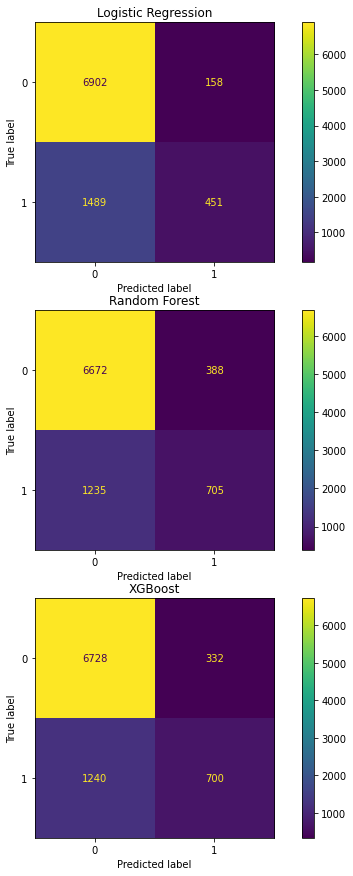

In [46]:
# Plot confusion matrix of 3 models

fig,ax=plt.subplots(3,1, figsize=(10,15))

plot_confusion_matrix(clf_lr, x_test, y_test, ax = ax[0], values_format="d")
ax[0].set_title("Logistic Regression")

plot_confusion_matrix(clf_rf, x_test, y_test, ax = ax[1], values_format="d")
ax[1].set_title("Random Forest")

plot_confusion_matrix(clf_xgb, x_test, y_test, ax = ax[2], values_format="d")
ax[2].set_title("XGBoost")

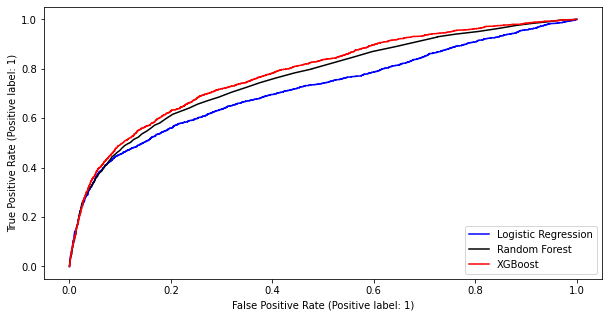

In [47]:
# Plot ROC_AUC curve of 3 models
 
fig,ax=plt.subplots(figsize=(10,5))

plot_roc_curve(clf_lr, x_test, y_test,ax=ax, color="blue",label='Logistic Regression')
plot_roc_curve(clf_rf, x_test, y_test,ax=ax, color="black",label='Random Forest')
plot_roc_curve(clf_xgb, x_test, y_test,ax=ax, color="red",label='XGBoost')

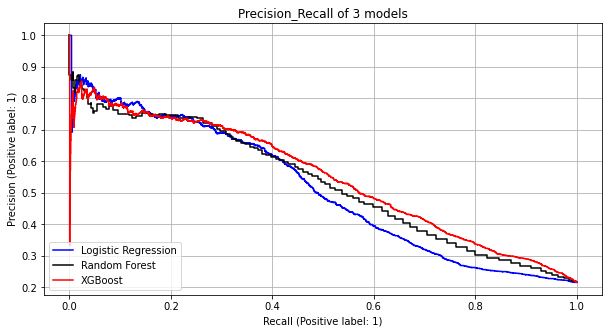

In [48]:
# Compare 3 models' Precision_recall curves

fig,ax=plt.subplots(figsize=(10,5))

plot_precision_recall_curve(clf_lr, x_test, y_test,ax=ax, color="blue",label='Logistic Regression')
plot_precision_recall_curve(clf_rf, x_test, y_test,ax=ax, color="black",label='Random Forest')
plot_precision_recall_curve(clf_xgb, x_test, y_test,ax=ax, color="red",label='XGBoost')

plt.title('Precision_Recall of 3 models')
plt.grid()

Logistic regression gives the best score and precision

###Feature Importance

Text(0.5, 1.0, 'Features importance')

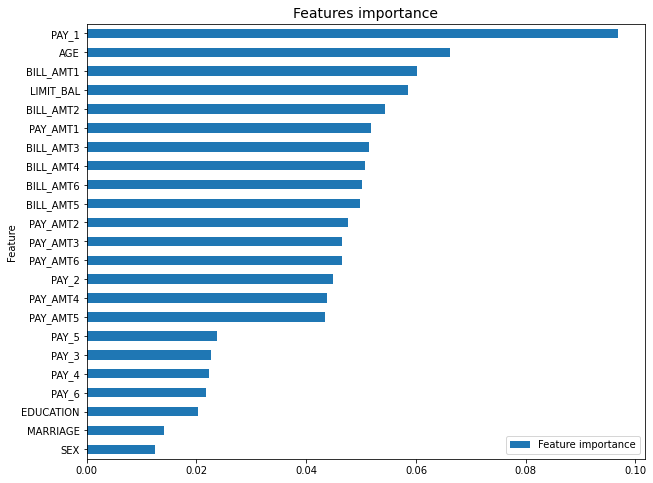

In [53]:
# Save all feature names as list

feature_cols = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

fea_df = pd.DataFrame({'Feature': feature_cols, 'Feature importance': clf_rf.feature_importances_})
fea_df = fea_df.sort_values(by='Feature importance')

figure, ax = plt.subplots(figsize = (10,8))
fea_df.plot.barh(x='Feature',y='Feature importance', ax=ax)
plt.title('Features importance',fontsize=14)

pay1 indicating the repayment status of previous month, Age, previous month bill amount, limit balance are the key features for predicting the default possibility

In [ ]:
#Building the best model with selected fetures

In [7]:
#setting features and target( x and y)
x=data[['LIMIT_BAL','AGE','PAY_1','BILL_AMT1']].values
y=data["DEFAULT"].values

#splitting training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)



In [8]:
model=LogisticRegression()
model.fit(x_train,y_train)



LogisticRegression()

In [10]:
#score
print("\n Accuracy:",model.score(x_test,y_test)*100,"%")


 Accuracy: 81.57777777777778 %


In [12]:
# Calculate precision and recall of Logistic Regression model

print('Logistic Regression model on test data:')
get_pre_rec_f1(model, x_test, y_test)

Logistic Regression model on test data:
Precision:0.715
Recall:0.242
F1 score:0.361


###Model Testing

In [42]:
model.predict([[40000,65,-1,10000]])

array([0])

**After analysing the scores and precision, I recommend Logistic regression model**